---
### 머신러닝 단계 Pipe Line


- Date loader
- Modelling
- prediction and evalution

--- 


<분류 모델에서 평가 부분, 정확도(Accuracy)와 오차행렬(Confusion Matrix)을 살펴보자.>

#### Bagging Algorithm

- RandomForest모델에서 사용하는 대표적인 알고리즘
- Sample추출 법은 Bootstrap방식을 따르고 최종적으로 예측하는 방법을 Aggregation으로 한다.
- 사이킷런은 RandomForestClassifier를 클래스를 통해 해당 모델 알고리즘을 생성하도록 지원한다.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

#### Data loader, Split and Shuffle 

In [14]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.2)

---
### RandomForest Model Generator

In [17]:
from sklearn.ensemble import RandomForestClassifier

#n_estimator=100 -> 의사결정 트리 100개
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

In [18]:
pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred,y_test)
accuracy

0.9333333333333333

--- 

### Confusion Matrix

- 성능지표에서 잘 활용하고 있는 Confusion Matrix는 학습이 끝낸 모델이 예측을 수행하면서
- 얼마나 혼란스러워하는지, 헷갈려하는지(?)를 잘 보여주는 지표.

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
y_true = [2,0,2,2,0,1] #실제 정답
y_pred = [0,0,2,2,0,2] #예측 
confusion_matrix(y_true,y_pred) #실제 정답을 먼저 놓고, 예측 결과값을 넣는다.


array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

#### 해석
(대각선)
- 실제 0인데 0으로 예측한게 2개. 
- 실제 2인데 실제로 예측한게 2개. 
- 실제 1인데 실제로 예측한게 0개.

([2,0] -> 실제로는 2인데 0으로 예측한 값이 1개)


In [21]:
a = ['cherry','apple','apple','banana','cherry'] #답
b = ['banana','banana','apple','banana','cherry'] #예측
confusion_matrix(a,b) #알파벳으로 정렬된다는 것에 주의. (apple - > banana - > cherry 순)

array([[1, 1, 0],
       [0, 1, 0],
       [0, 1, 1]], dtype=int64)

In [22]:
#라벨 순서 정해서 해보기.

a = ['cherry','apple','apple','banana','cherry'] #답
b = ['banana','banana','apple','banana','cherry']
confusion_matrix(a,b,labels=['cherry','banana','apple'])

array([[1, 1, 0],
       [0, 1, 0],
       [0, 1, 1]], dtype=int64)

#### Confusion Matrix 데이터프레임으로 구현

In [24]:
cm = pd.DataFrame(confusion_matrix(y_test,pred),columns=iris.target_names , index=iris.target_names)
cm

#훨씬 보기 편해졌다! 

,setosa,versicolor,virginica
setosa,10,0,0
versicolor,0,7,1
virginica,0,1,11


<AxesSubplot:>

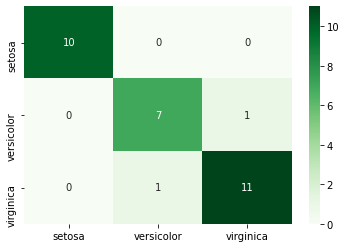

In [38]:
sns.heatmap(cm,annot=True,cmap=plt.cm.Greens)